# Compute  PCA with Method 3 NMF

- use ICA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/12/27

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from sklearn.decomposition import NMF, FastICA, PCA

In [4]:
from astropy.io import fits

In [5]:
import copy

In [6]:
filename = 'pca_SL_data.fits'
hdu = fits.open(filename)
data_in=hdu[0].data

In [7]:
data_in

array([[0.00000000e+00, 9.10000000e+01, 9.40000000e+01, ...,
        9.95000000e+03, 9.97000000e+03, 9.99000000e+03],
       [0.00000000e+00, 4.97839069e-07, 5.52382959e-07, ...,
        7.06085364e-05, 7.06330908e-05, 7.05906948e-05],
       [0.00000000e+00, 1.19574179e-06, 1.27758431e-06, ...,
        4.46025945e-05, 4.46908296e-05, 4.46647757e-05],
       ...,
       [7.36000000e+02, 2.14675694e-06, 2.50389986e-06, ...,
        2.12861759e-05, 2.12363909e-05, 2.11664152e-05],
       [7.37000000e+02, 8.31448778e-07, 9.57832321e-07, ...,
        7.00733914e-05, 6.99426115e-05, 7.00519814e-05],
       [7.38000000e+02, 7.21010321e-08, 8.01113405e-08, ...,
        1.50517900e-04, 1.50795383e-04, 1.50744720e-04]])

In [8]:
NSED = data_in.shape[0]-3
NWL = data_in.shape[1]-1

In [9]:
wavelengths = data_in[0,1:] 
flambdas_average = data_in[1,1:] 
flambdas_std = data_in[2,1:] 
spec = data_in[3:,1:] 
all_numbers = data_in[3:,0] 

In [10]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_8116/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

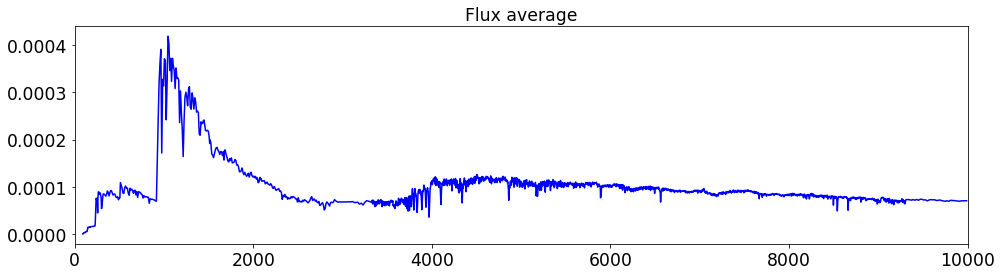

In [11]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

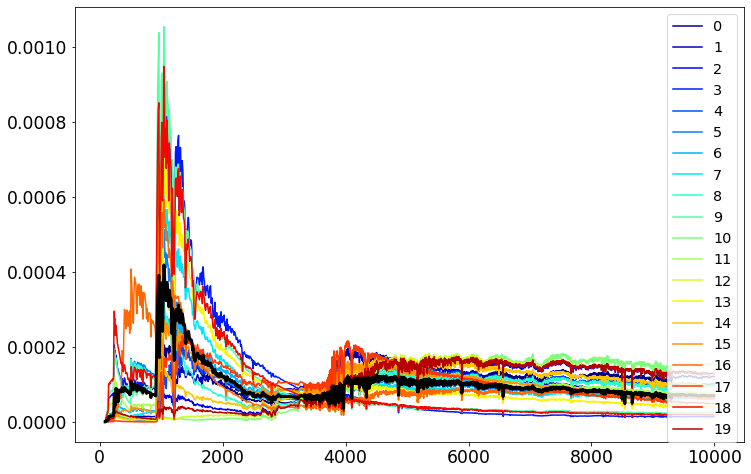

In [12]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

In [13]:
#https://www.astroml.org/astroML-notebooks/chapter7/astroml_chapter7_Dimensionality_Reduction.html
#https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca

In [14]:
n_components=40

flux = copy.deepcopy(spec) 
flux[flux < 0] = 0
nmf = NMF(n_components, random_state=0)
nmf.fit(flux)
nmf_comp = nmf.components_

/Users/dagoret/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/dagoret/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [15]:
nmf_comp.shape

(40, 6361)

In [16]:
X = copy.deepcopy(flux)
n_samples = X.shape[0]

cov_matrix = np.dot(X.T, X) / n_samples
evecs = []
evals = []
for idx in range(n_components):
    eigenvector = nmf_comp[idx,:]
    eigenvalue = np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    evecs.append(eigenvector)
    evals.append(eigenvalue)
    print(f"eigen value {idx} : ",eigenvalue)

eigen value 0 :  9.89764855718015e-06
eigen value 1 :  1.0186115020181632e-06
eigen value 2 :  1.7789496342473405e-07
eigen value 3 :  7.609983899442251e-07
eigen value 4 :  4.333027755685804e-08
eigen value 5 :  1.529483378004034e-06
eigen value 6 :  4.817362246570463e-07
eigen value 7 :  2.3151058552487137e-07
eigen value 8 :  5.882928918461699e-08
eigen value 9 :  1.982341621527319e-07
eigen value 10 :  1.1080906066808018e-09
eigen value 11 :  4.7948451412369466e-09
eigen value 12 :  4.0316331630871705e-06
eigen value 13 :  1.0668104713947601e-05
eigen value 14 :  5.614729446877042e-10
eigen value 15 :  3.136388610866215e-07
eigen value 16 :  4.988145010454658e-08
eigen value 17 :  6.526016034938802e-06
eigen value 18 :  3.724226324041903e-07
eigen value 19 :  2.4528296783505066e-09
eigen value 20 :  1.2428349076842987e-08
eigen value 21 :  3.5332355987161346e-09
eigen value 22 :  3.941044370395751e-08
eigen value 23 :  7.773460557042521e-07
eigen value 24 :  1.1789466184274444e-07


In [17]:
evecs = np.vstack(evecs)
evals=np.array(evals)

In [18]:
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]

In [19]:
evecs.shape

(40, 6361)

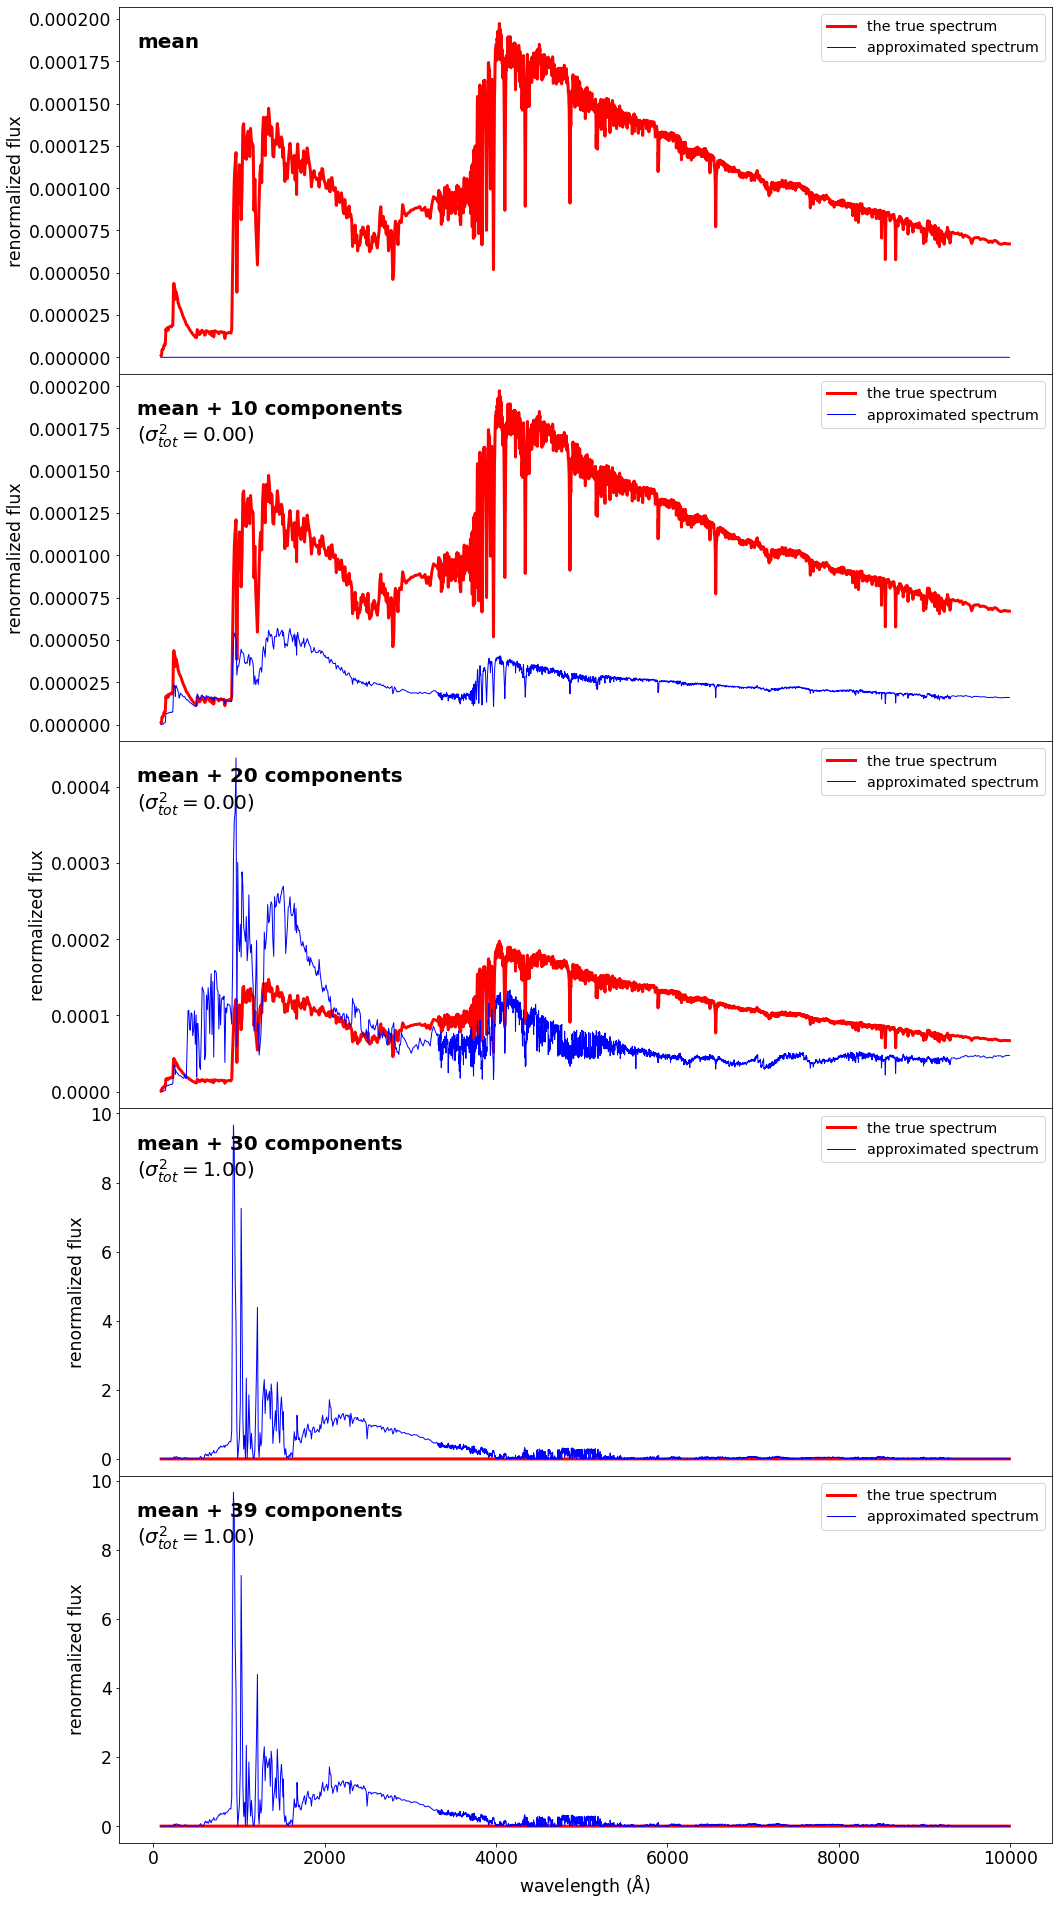

In [21]:
#------------------------------------------------------------
# Find the coefficients of a particular spectrum
idx=1
the_spec = flux[idx,:]
coeff = np.dot(evecs, the_spec)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(16, 30))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 10 , 20, 30, 39 ]):
    ax = fig.add_subplot(5,1,1 + i)
    ax.plot(wavelengths, the_spec, '-', color='red',lw=3,label="the true spectrum")
    ax.plot(wavelengths, np.dot(coeff[:n], evecs[:n]), '-b',lw=1,label="approximated spectrum")

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    #ax.set_ylim(-2, 21)
    ax.set_ylabel('renormalized flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes,fontsize=20,fontweight="bold")
    ax.legend()

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

In [ ]:
#plt.step(np.arange(len(coeff)),coeff)
plt.plot(range(len(coeff)),np.abs(coeff),'ob-')

In [ ]:
fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(hspace=0.05, bottom=0.12)

ax = fig.add_subplot(211, xscale='log', yscale='log')
ax.grid()
ax.plot(evals, c='b')
ax.set_ylabel('Normalized Eigenvalues')
ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.set_ylim(5E-4, 100)

ax = fig.add_subplot(212, xscale='log')
ax.grid()
ax.semilogx(evals_cs, color='b')
ax.set_xlabel('Eigenvalue Number')
ax.set_ylabel('Cumulative Eigenvalues')
#ax.set_ylim(0.65, 1.00)
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(wavelengths,evecs[0,:],'r-')
plt.plot(wavelengths,evecs[1,:],'b-')
plt.plot(wavelengths,evecs[2,:],'g-')
plt.plot(wavelengths,evecs[4,:],'k-')

In [ ]:
fig = plt.figure(figsize=(12, 30))

for j in range(n_components):
    ax = fig.add_subplot(n_components, 1,  1 + j)

    #ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.xaxis.set_major_locator(plt.FixedLocator(list(range(0, 10000, 2000))))
        ax.set_xlabel(r'wavelength ${\rm (\AA)}$')

        ax.plot(wavelengths, evecs[j], '-k', lw=1)

        # plot zero line
        xlim = [0, 10000]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)

 
        
        label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines():
            l.set_markersize(2)

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])

        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
        ax.set_xlim(xlim)
